In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import joblib
import seaborn as sns



In [62]:
data=pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   status         1319 non-null   object 
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   impluse        1319 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [63]:
# print(data.head(5))
data.describe()


,age,gender,pressurehight,pressurelow,glucose,kcm,troponin,impluse
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,127.170584,72.269143,146.634344,15.274306,0.360942,78.336619
std,13.647315,0.474027,26.122720,14.033924,74.923045,46.327083,1.154568,51.630270
min,14.000000,0.000000,42.000000,38.000000,35.000000,0.321000,0.001000,20.000000
25%,47.000000,0.000000,110.000000,62.000000,98.000000,1.655000,0.006000,64.000000
50%,58.000000,1.000000,124.000000,72.000000,116.000000,2.850000,0.014000,74.000000
75%,65.000000,1.000000,143.000000,81.000000,169.500000,5.805000,0.085500,85.000000
max,103.000000,1.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1111.000000


## Vérifier la redondance , les valeurs null et les champs vides

In [64]:
print(data.isnull().sum())
print(data.isna().sum())
print(data.duplicated().sum())

age              0
gender           0
status           0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
impluse          0
dtype: int64
age              0
gender           0
status           0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
impluse          0
dtype: int64
0


In [65]:
data['status'].value_counts()

status
positive    810
negative    509
Name: count, dtype: int64

### Encodage du Cible

In [66]:
# encoder=OneHotEncoder(sparse_output=False)
encoder=LabelEncoder()
data['status']=encoder.fit_transform(data['status'])
# print(data['status'])
data
# variable_categorielles = encoder.get_feature_names_out(['status'])
# encoded_df = pd.DataFrame(encoded_cat, columns=variable_categorielles)
# new_data = data.drop(columns=['status'])
# new_data = pd.concat([encoded_df,new_data],axis=1)
# print(new_data.head(5).to_string())

,age,gender,status,pressurehight,pressurelow,glucose,kcm,troponin,impluse
0,64,1,0,160,83,160.0,1.80,0.012,66
1,21,1,1,98,46,296.0,6.75,1.060,94
2,55,1,0,160,77,270.0,1.99,0.003,64
3,64,1,1,120,55,270.0,13.87,0.122,70
4,55,1,0,112,65,300.0,1.08,0.003,64
...,...,...,...,...,...,...,...,...,...
1314,44,1,0,122,67,204.0,1.63,0.006,94
1315,66,1,1,125,55,149.0,1.33,0.172,84
1316,45,1,1,168,104,96.0,1.24,4.250,85
1317,54,1,1,117,68,443.0,5.80,0.359,58


## Visualisation

#### correlation pour les variables numeriques

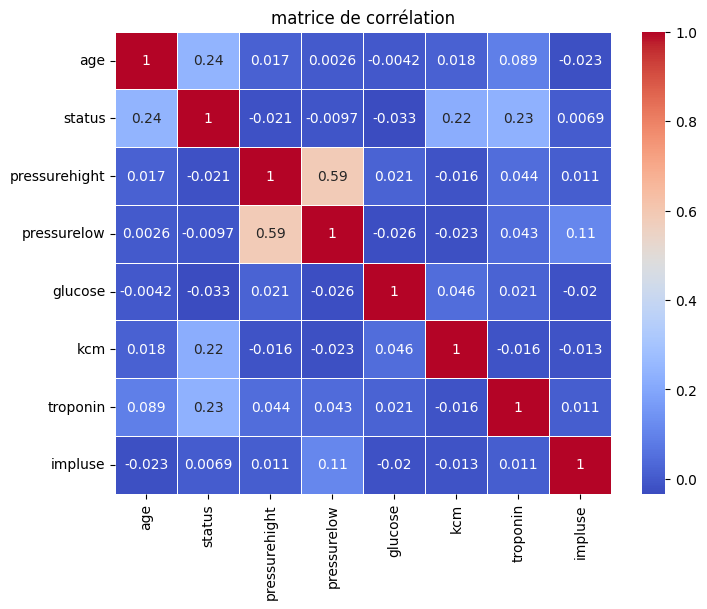

In [74]:
#matrice correlation
# num_col = data.drop(columns=['status']) a supprimer 
num_col = data.drop(columns=['gender'])
corr_matrix = num_col.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('matrice de corrélation')
plt.show()

### Visulation des variables categoriels

In [ ]:
sns.countplot()

## Split et Normalisation des donnees

In [68]:
X=data.drop(columns=['status'])
y=data['status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

num_cols = ['age','pressurehight','pressurelow','glucose','kcm','troponin','impluse']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Entrainement du model

In [72]:
# print(data.head())

pipeline = Pipeline( steps=[
    ('model',RandomForestClassifier(class_weight='balanced'))
])

param_grid=[
    {
        'model__n_estimators':[100,200],
        'model__max_depth':[5,10,None],
        'model__min_samples_split':[2,5]
    }
]

grid_search=GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

model = grid_search.best_estimator_

# print("best_estimator_: ",grid_search.best_estimator_)
# print("best_params_: ",grid_search.best_params_)
# print("cv: ",grid_search.best_score_)

y_pred = model.predict(X_test)
print("F1-score: ",f1_score(y_test,y_pred))

joblib.dump(grid_search.best_estimator_,'model_cardio.pkl')


F1-score:  0.9815950920245399


['model_cardio.pkl']

In [73]:
model=joblib.load("model_cardio.pkl")
# print(model)
print(model.get_params())


{'memory': None, 'steps': [('model', RandomForestClassifier(class_weight='balanced'))], 'transform_input': None, 'verbose': False, 'model': RandomForestClassifier(class_weight='balanced'), 'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__monotonic_cst': None, 'model__n_estimators': 100, 'model__n_jobs': None, 'model__oob_score': False, 'model__random_state': None, 'model__verbose': 0, 'model__warm_start': False}
